# Coffee Sales

This notebook provides a sales analysis of a local coffeeshop

In [2]:
# # Install dependencies as needed:
# !pip install kagglehub
# !pip install openpyxl

In [3]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/home/cullen-fedora/Documents/Python-Projects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
plt.style.use('seaborn-v0_8')

In [5]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("reignrichard/coffee-store-sales")
print("Path to dataset files:", path)

# Load the dataset
df = pd.read_excel(path + "/Coffe_sales.xlsx")
df.head()

Path to dataset files: /home/cullen-fedora/.cache/kagglehub/datasets/reignrichard/coffee-store-sales/versions/2


,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date            0
datetime        0
hour_of_day     0
cash_type       0
card           89
money           0
coffee_name     0
Time_of_Day     0
Weekday         0
Month_name      0
Weekdaysort     0
Monthsort       0
dtype: int64


In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


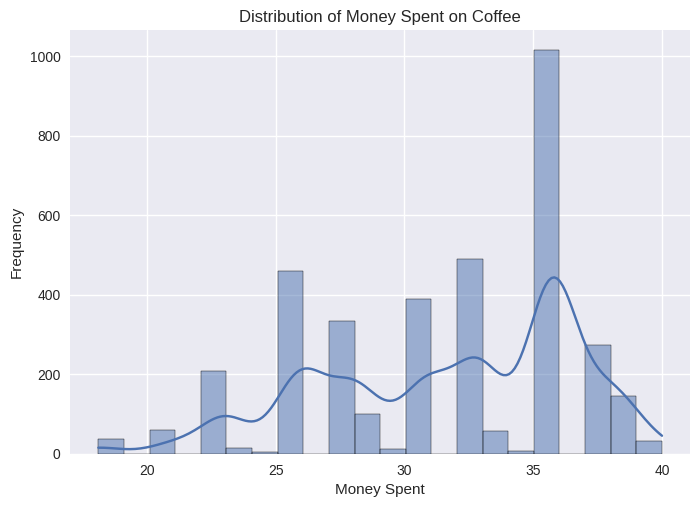

In [9]:
sns.histplot(data=df, x='money', bins='auto', kde=True)
plt.title('Distribution of Money Spent on Coffee')
plt.xlabel('Money Spent')
plt.ylabel('Frequency')
plt.show()

In [10]:
df.describe()

,date,datetime,hour_of_day,money,Weekdaysort,Monthsort
count,3636,3636,3636.000000,3636.000000,3636.000000,3636.000000
mean,2024-09-30 11:56:02.376237568,2024-10-01 02:35:30.535053568,14.166942,31.746859,3.847910,6.394664
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,6.000000,18.120000,1.000000,1.000000
25%,2024-07-03 00:00:00,2024-07-03 16:54:06.084750080,10.000000,27.920000,2.000000,3.000000
50%,2024-10-06 12:00:00,2024-10-07 02:55:12.649500160,14.000000,32.820000,4.000000,6.000000
75%,2025-01-08 00:00:00,2025-01-08 07:55:20.299750144,18.000000,35.760000,6.000000,10.000000
max,2025-03-23 00:00:00,2025-03-23 18:11:38.635000,22.000000,40.000000,7.000000,12.000000
std,NaN,NaN,4.227755,4.919926,1.975983,3.480686
